In this file i will process the data so that i can train my ML model on the basis of it

#### Importing the required libraries and the modules

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

In [4]:
df=pd.read_csv('../data/cleaned_data.csv')
df.head()

,Unnamed: 0,monthly_income,monthly_expense_total,savings_rate,financial_scenario,credit_score,debt_to_income_ratio,loan_payment,investment_amount,subscription_services,emergency_fund,transaction_count,fraud_flag,income_type,cash_flow_status,financial_advice_score,financial_stress_level,actual_savings,savings_goal_met
0,0,3119.58,3212.07,0.38,inflation,721.0,0.56,125.77,689.22,3,510.58,68,0,Freelance,Positive,8.3,Low,0.00,0
1,1,3262.44,3732.81,0.10,inflation,670.0,0.42,454.19,360.34,4,1154.41,41,0,Salary,Positive,22.6,Low,0.00,0
2,2,2931.20,3335.58,0.15,inflation,691.0,0.24,971.82,0.00,5,1433.02,90,0,Freelance,Positive,58.8,Low,0.00,0
3,3,3506.79,2327.59,0.17,normal,717.0,0.16,482.76,182.06,5,227.37,94,0,Freelance,Positive,74.5,Low,1179.20,0
4,4,4606.87,2182.58,0.34,inflation,795.0,0.25,263.74,342.78,9,589.81,73,0,Salary,Negative,38.7,High,2424.29,0


#### Feature Engineering

There is no column in the dataset that classifies the person as the creditworthyor not .Although a column named credit_score is present but it contains the continuous values instead of the binary values that are required for the training of the classification models like logistic regression.
To solve this problem , I am going to engineer a new column based on some of the metrics that will be picked from the dataset using my domain knowledge

As we know that in the banks,a person is generally considered creditworthy,if possess the following:
--high income
--low debt
--good savings
and vice versa for the less creditworthy person

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3000 non-null   int64  
 1   monthly_income          3000 non-null   float64
 2   monthly_expense_total   3000 non-null   float64
 3   savings_rate            3000 non-null   float64
 4   financial_scenario      3000 non-null   object 
 5   credit_score            3000 non-null   float64
 6   debt_to_income_ratio    3000 non-null   float64
 7   loan_payment            3000 non-null   float64
 8   investment_amount       3000 non-null   float64
 9   subscription_services   3000 non-null   int64  
 10  emergency_fund          3000 non-null   float64
 11  transaction_count       3000 non-null   int64  
 12  fraud_flag              3000 non-null   int64  
 13  income_type             3000 non-null   object 
 14  cash_flow_status        3000 non-null   

In [6]:
saving_threshold=(df['actual_savings']).mean()

In [7]:
DTI_threshold=(df['debt_to_income_ratio']).mean()

In [8]:
df['creditworthy']=((df['actual_savings']>saving_threshold) & (df['debt_to_income_ratio']<DTI_threshold)).astype(int)

In [9]:
df.head()

,Unnamed: 0,monthly_income,monthly_expense_total,savings_rate,financial_scenario,credit_score,debt_to_income_ratio,loan_payment,investment_amount,subscription_services,emergency_fund,transaction_count,fraud_flag,income_type,cash_flow_status,financial_advice_score,financial_stress_level,actual_savings,savings_goal_met,creditworthy
0,0,3119.58,3212.07,0.38,inflation,721.0,0.56,125.77,689.22,3,510.58,68,0,Freelance,Positive,8.3,Low,0.00,0,0
1,1,3262.44,3732.81,0.10,inflation,670.0,0.42,454.19,360.34,4,1154.41,41,0,Salary,Positive,22.6,Low,0.00,0,0
2,2,2931.20,3335.58,0.15,inflation,691.0,0.24,971.82,0.00,5,1433.02,90,0,Freelance,Positive,58.8,Low,0.00,0,0
3,3,3506.79,2327.59,0.17,normal,717.0,0.16,482.76,182.06,5,227.37,94,0,Freelance,Positive,74.5,Low,1179.20,0,1
4,4,4606.87,2182.58,0.34,inflation,795.0,0.25,263.74,342.78,9,589.81,73,0,Salary,Negative,38.7,High,2424.29,0,1


In [10]:
(df['creditworthy']).value_counts()

creditworthy
0    2308
1     692
Name: count, dtype: int64

In [11]:
label=df['creditworthy']
features=df[['monthly_income','monthly_expense_total','savings_rate','credit_score','debt_to_income_ratio','financial_advice_score']]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=42)    

In [21]:
model=LogisticRegression(max_iter=10000,solver='saga',class_weight='balanced')
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, solver='saga')

In [22]:
joblib.dump(model,'../src/credit_scoring_model.pkl')

['../src/credit_scoring_model.pkl']

In [23]:
loaded_model=joblib.load('../src/credit_scoring_model.pkl')

In [24]:
y_pred=loaded_model.predict(x_test)

In [20]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       527
           1       0.23      0.45      0.31        73

    accuracy                           0.75       600
   macro avg       0.57      0.62      0.58       600
weighted avg       0.83      0.75      0.78       600



In the classification report its obvious that the precision ,recall and f1 score is very low for the 1 class.This is because our dataset is biased towards 0 because of more samples of the 0.Therefore for the true classification we will evaluate it using the ROC-AUC score which is an ideal metric in cases of the imbalanced datasets.

In [27]:
y_prob=loaded_model.predict_proba(x_test)[:,1]
# AUC score
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", auc)

ROC-AUC Score: 0.8492907530106656


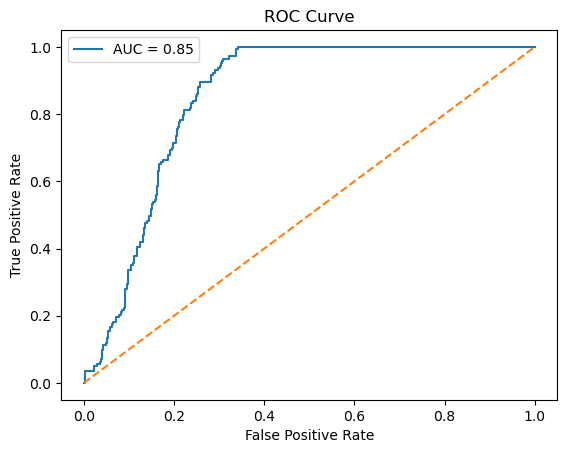

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig('../plots/ROC_AUC.png')
plt.show()